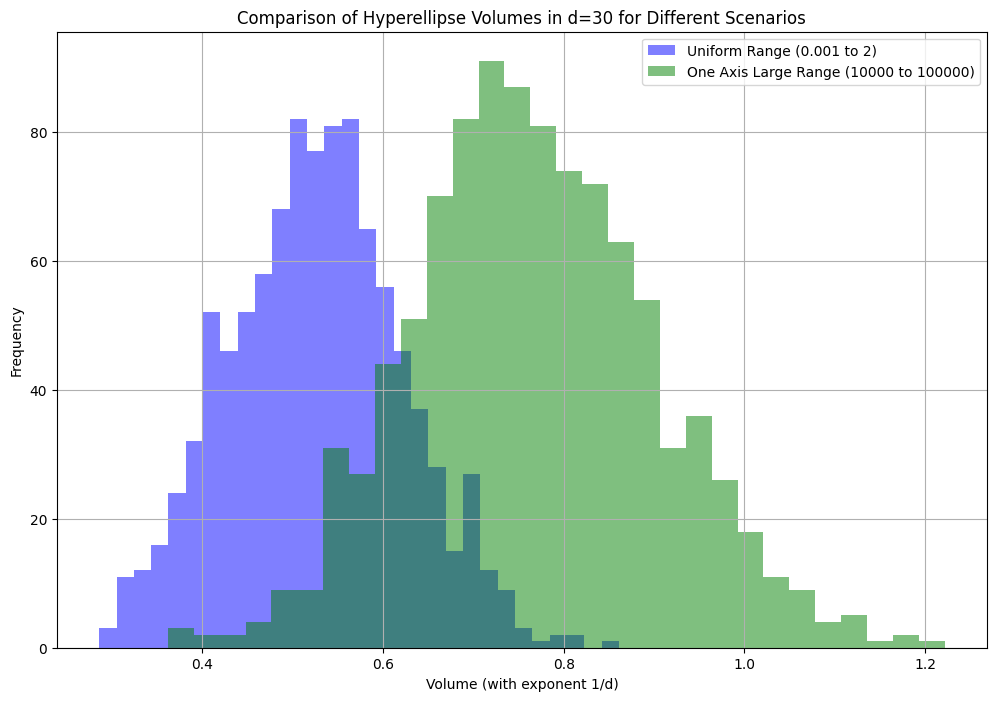

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# Define the dimension d
d = 30

# Calculate the first factor of the volume formula for d=30
first_factor_d30 = (np.pi ** (d / 2)) / gamma((d / 2) + 1)

# Number of random configurations to generate
num_configurations = 1000

# Generate random values for a in d=30 dimensions with three different scenarios
# Scenario 1: Uniform range from 0.001 to 2
random_a_uniform = [np.random.uniform(0.001, 2, d) for _ in range(num_configurations)]

# Scenario 2: One axis in the range 10000 to 100000, rest from 0.001 to 2
random_a_one_large = [np.random.uniform(0.001, 2, d) for _ in range(num_configurations)]
for a_values in random_a_one_large:
    a_values[0] = np.random.uniform(10000, 100000)

# Scenario 3: All axes in the range 10000 to 100000
random_a_all_large = [np.random.uniform(10000, 100000, d) for _ in range(num_configurations)]

# Compute the volumes for each scenario
volumes_uniform = [(first_factor_d30 * np.prod(a_values))**(1/d) for a_values in random_a_uniform]
volumes_one_large = [(first_factor_d30 * np.prod(a_values))**(1/d) for a_values in random_a_one_large]
volumes_all_large = [(first_factor_d30 * np.prod(a_values))**(1/d) for a_values in random_a_all_large]

# Plotting histograms for all three scenarios
plt.figure(figsize=(12, 8))

# Histogram for uniform range scenario
plt.hist(volumes_uniform, bins=30, color='blue', alpha=0.5, label='Uniform Range (0.001 to 2)')

# Histogram for one axis large range scenario
plt.hist(volumes_one_large, bins=30, color='green', alpha=0.5, label='One Axis Large Range (10000 to 100000)')

plt.xlabel('Volume (with exponent 1/d)')
plt.ylabel('Frequency')
plt.title('Comparison of Hyperellipse Volumes in d=30 for Different Scenarios')
plt.grid(True)
plt.legend()
plt.show()


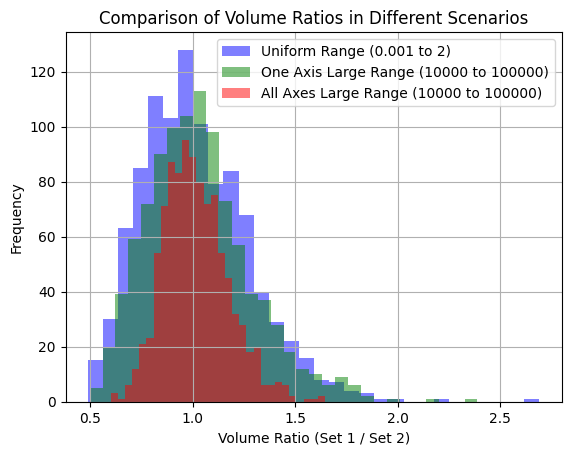

In [12]:
# Generate two sets of random values for a in d=30 dimensions for each scenario
# Scenario 1: Uniform range from 0.001 to 2
random_a_uniform_set1 = [np.random.uniform(0.001, 2, d) for _ in range(num_configurations)]
random_a_uniform_set2 = [np.random.uniform(0.001, 2, d) for _ in range(num_configurations)]

# Compute the volumes for each set in Scenario 1
volumes_uniform_set1 = [(first_factor_d30 * np.prod(a_values))**(1/d) for a_values in random_a_uniform_set1]
volumes_uniform_set2 = [(first_factor_d30 * np.prod(a_values))**(1/d) for a_values in random_a_uniform_set2]

# Compute the ratio of volumes for Scenario 1
volume_ratios_uniform = np.array(volumes_uniform_set1) / np.array(volumes_uniform_set2)


# Implementing the volume ratio comparison for all three scenarios
# Scenario 2: One Axis Large Range
random_a_one_large_set1 = [np.random.uniform(0.001, 2, d) for _ in range(num_configurations)]
random_a_one_large_set2 = [np.random.uniform(0.001, 2, d) for _ in range(num_configurations)]
for a_values in random_a_one_large_set1:
    a_values[0] = np.random.uniform(10000, 100000)
for a_values in random_a_one_large_set2:
    a_values[0] = np.random.uniform(10000, 100000)
volumes_one_large_set1 = [(first_factor_d30 * np.prod(a_values))**(1/d) for a_values in random_a_one_large_set1]
volumes_one_large_set2 = [(first_factor_d30 * np.prod(a_values))**(1/d) for a_values in random_a_one_large_set2]
volume_ratios_one_large = np.array(volumes_one_large_set1) / np.array(volumes_one_large_set2)

# Scenario 3: All Axes Large Range
random_a_all_large_set1 = [np.random.uniform(10000, 100000, d) for _ in range(num_configurations)]
random_a_all_large_set2 = [np.random.uniform(10000, 100000, d) for _ in range(num_configurations)]
volumes_all_large_set1 = [(first_factor_d30 * np.prod(a_values))**(1/d) for a_values in random_a_all_large_set1]
volumes_all_large_set2 = [(first_factor_d30 * np.prod(a_values))**(1/d) for a_values in random_a_all_large_set2]
volume_ratios_all_large = np.array(volumes_all_large_set1) / np.array(volumes_all_large_set2)

# Histogram for uniform range scenario
plt.hist(volume_ratios_uniform, bins=30, color='blue', alpha=0.5, label='Uniform Range (0.001 to 2)')

# Histogram for one axis large range scenario
plt.hist(volume_ratios_one_large, bins=30, color='green', alpha=0.5, label='One Axis Large Range (10000 to 100000)')

# Histogram for all axes large range scenario
plt.hist(volume_ratios_all_large, bins=30, color='red', alpha=0.5, label='All Axes Large Range (10000 to 100000)')

plt.xlabel('Volume Ratio (Set 1 / Set 2)')
plt.ylabel('Frequency')
plt.title('Comparison of Volume Ratios in Different Scenarios')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# Function to generate raw volumes (without exponent 1/d)
def generate_raw_volumes(range_min, range_max, one_large_axis=False):
    raw_volumes = []
    for _ in range(num_configurations):
        if one_large_axis:
            # One axis has a different range
            a_values = np.random.uniform(range_min, range_max, d)
            a_values[0] = np.random.uniform(1000, 100000)  # Larger range for one axis
        else:
            # All axes have the same range
            a_values = np.random.uniform(range_min, range_max, d)
        
        volume = first_factor_d30 * np.prod(a_values)
        raw_volumes.append(volume)

    return raw_volumes

# Generate raw volumes for each scenario
raw_volumes_uniform_1 = generate_raw_volumes(0.001, 2)
raw_volumes_uniform_2 = generate_raw_volumes(0.001, 2)
raw_volumes_one_large_1 = generate_raw_volumes(0.001, 2, one_large_axis=True)
raw_volumes_one_large_2 = generate_raw_volumes(0.001, 2, one_large_axis=True)
raw_volumes_all_large_1 = generate_raw_volumes(1000, 100000)
raw_volumes_all_large_2 = generate_raw_volumes(1000, 100000)

# Compute the raw ratio of volumes for each scenario
raw_volume_ratios_uniform = np.array(raw_volumes_uniform_1) / np.array(raw_volumes_uniform_2)
raw_volume_ratios_one_large = np.array(raw_volumes_one_large_1) / np.array(raw_volumes_one_large_2)
raw_volume_ratios_all_large = np.array(raw_volumes_all_large_1) / np.array(raw_volumes_all_large_2)

# Plotting histograms for all three scenarios with a normal scale on the y-axis and logarithmic scale on the x-axis


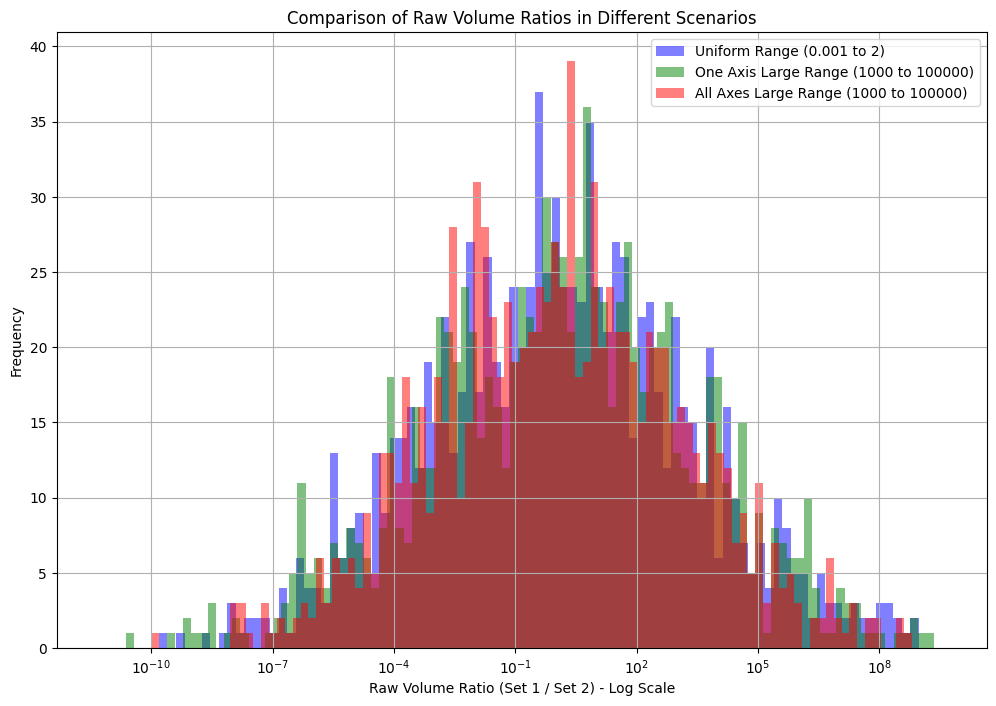

In [18]:
# Adjusting the histogram plotting to handle the wide range of values

# Function to plot histogram with logarithmic bins
def plot_log_histogram(data, color, label):
    # Generate logarithmically spaced bins
    bins = np.logspace(np.log10(min(data)), np.log10(max(data)), 100)
    plt.hist(data, bins=bins, color=color, alpha=0.5, label=label)

# Plotting histograms for all three scenarios with log bins
plt.figure(figsize=(12, 8))

# Histogram for uniform range scenario with log bins
plot_log_histogram(raw_volume_ratios_uniform, 'blue', 'Uniform Range (0.001 to 2)')

# Histogram for one axis large range scenario with log bins
plot_log_histogram(raw_volume_ratios_one_large, 'green', 'One Axis Large Range (1000 to 100000)')

# Histogram for all axes large range scenario with log bins
plot_log_histogram(raw_volume_ratios_all_large, 'red', 'All Axes Large Range (1000 to 100000)')

plt.xscale('log')
plt.yscale('linear')  # Keeping y-axis in normal scale
plt.xlabel('Raw Volume Ratio (Set 1 / Set 2) - Log Scale')
plt.ylabel('Frequency')
plt.title('Comparison of Raw Volume Ratios in Different Scenarios')
plt.legend()
plt.grid(True)
plt.show()
